In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/sq3508nw/Desktop/WorldBank/WA_Fn-UseC_-Telco-Customer-Churn1.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7018.000000,7018.000000,7018.000000,7018.000000
mean,0.162439,32.357937,64.753691,2282.838112
std,0.368880,24.548367,30.102518,2264.900219
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.462500,401.587500
50%,0.000000,29.000000,70.350000,1400.425000
75%,0.000000,55.000000,89.850000,3783.600000
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

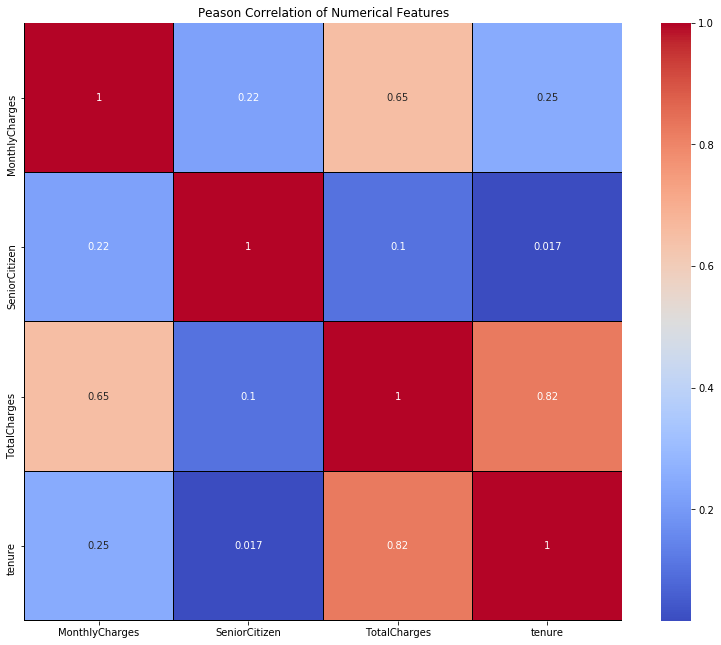

In [9]:
str_list = [] 
for colname, colvalue in data.iteritems():
    if type(colvalue[2]) == str:
        str_list.append(colname)
        

num_list = data.columns.difference(str_list)


data_num=  data[num_list]
f, ax = plt.subplots(figsize = (14, 11))
plt.title('Peason Correlation of Numerical Features')

# Ploting a heat map using seaborn
sns.heatmap(data_num.astype(float).corr(), linewidths = 0.25, vmax =1.0,
           square = True, cmap = 'coolwarm', linecolor = 'k', annot = True)
plt.show()

In [10]:
data['gender'] = data['gender'].apply(lambda Gender:1 if Gender=='Male' else 0)
data['Partner'] = data['Partner'].apply(lambda Partner:1 if Partner=='Yes' else 0)
data['Dependents'] = data['Dependents'].apply(lambda Dependent:1 if Dependent=='Yes' else 0)
data['PhoneService'] = data['PhoneService'].apply(lambda PhoneService:1 if PhoneService=='Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].apply(lambda PaperlessBilling:1 if PaperlessBilling=='Yes' else 0)

In [11]:
data['Churn'] = data['Churn'].apply(lambda Churn:1 if Churn=='Yes' else 0)

In [12]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000,7018.000000
mean,0.505130,0.162439,0.482901,0.299088,32.357937,0.903249,0.592761,64.753691,2282.838112,0.265175
std,0.500009,0.368880,0.499743,0.457891,24.548367,0.295640,0.491355,30.102518,2264.900219,0.441458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.462500,401.587500,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1400.425000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3783.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


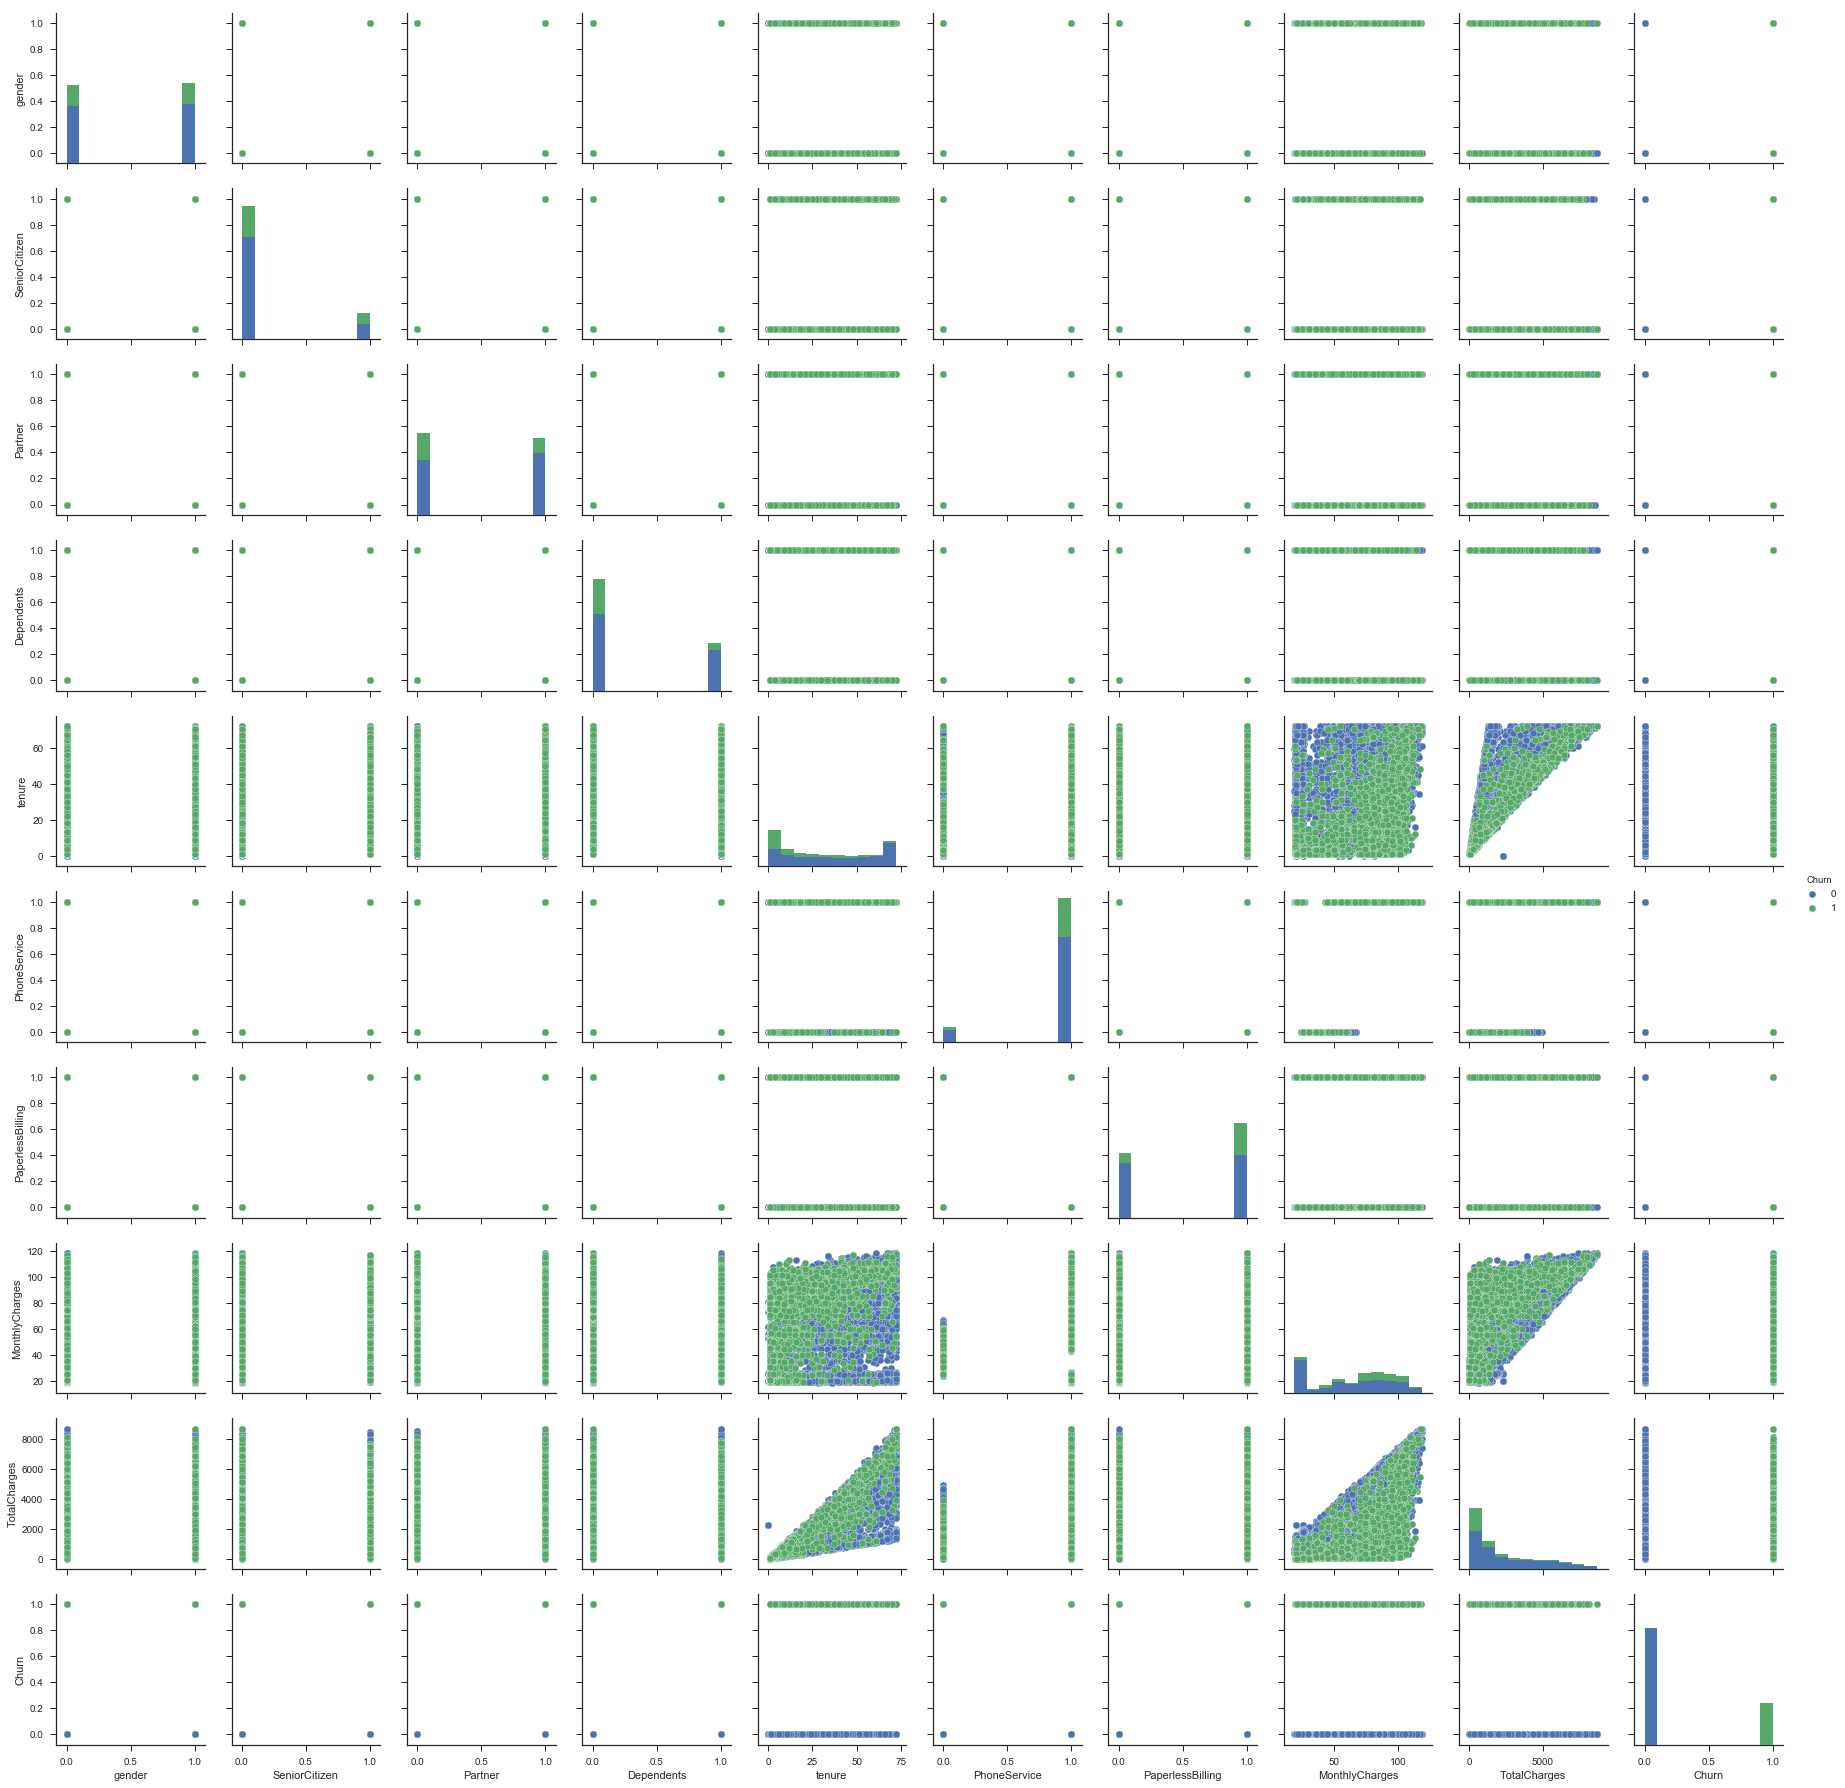

In [13]:
sns.set(style='ticks')
plt.figure(figsize=(20,20))
sns.pairplot(data, hue='Churn')

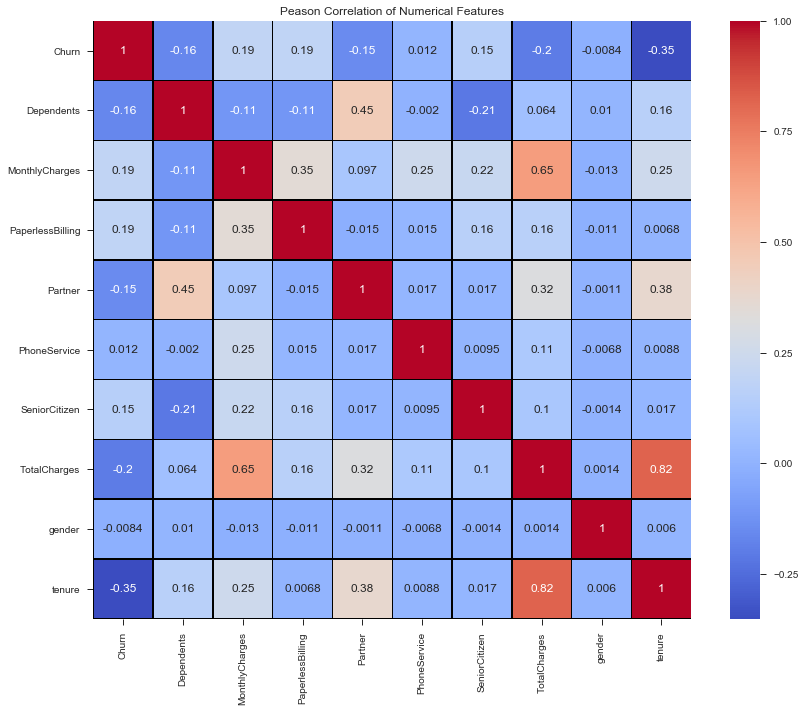

In [14]:
str_list = [] 
for colname, colvalue in data.iteritems():
    if type(colvalue[2]) == str:
        str_list.append(colname)
        

num_list = data.columns.difference(str_list)


data_num=  data[num_list]
f, ax = plt.subplots(figsize = (14, 11))
plt.title('Peason Correlation of Numerical Features')

# Ploting a heat map using seaborn
sns.heatmap(data_num.astype(float).corr(), linewidths = 0.25, vmax =1.0,
           square = True, cmap = 'coolwarm', linecolor = 'k', annot = True)
plt.show()

In [15]:
print(data.shape)
data = pd.get_dummies(data = data, columns = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','StreamingMovies','Contract','PaymentMethod'])
print(data.shape)
data.head()

(7018, 21)
(7018, 45)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


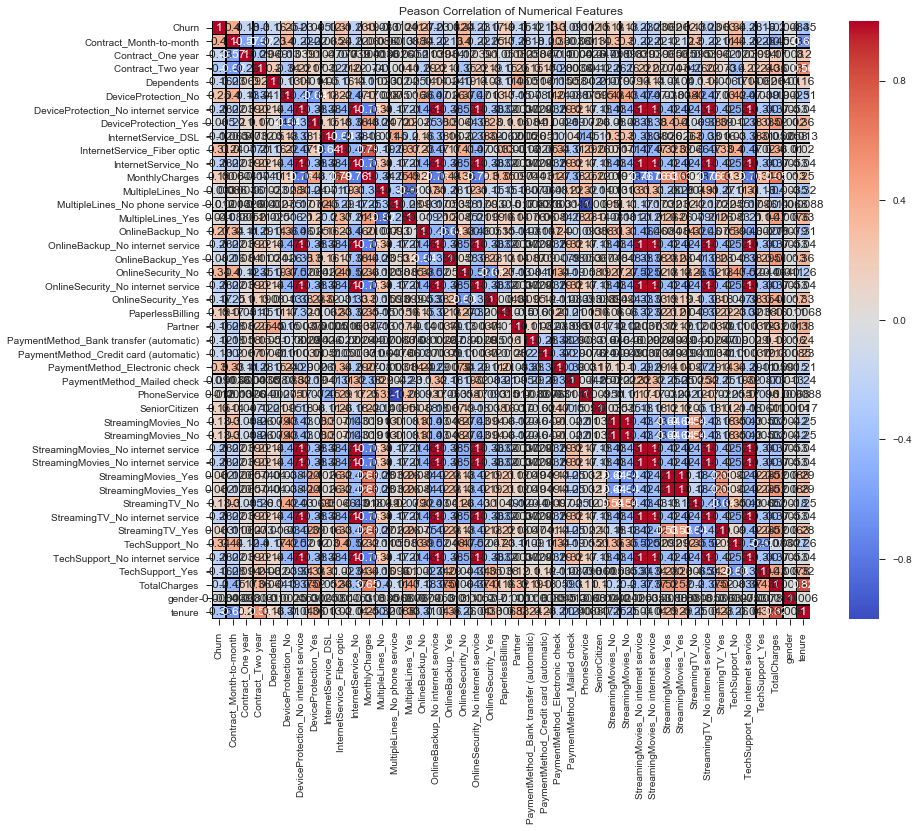

In [16]:
str_list = [] 
for colname, colvalue in data.iteritems():
    if type(colvalue[2]) == str:
        str_list.append(colname)
        

num_list = data.columns.difference(str_list)


data_num=  data[num_list]
f, ax = plt.subplots(figsize = (14, 11))
plt.title('Peason Correlation of Numerical Features')

# Ploting a heat map using seaborn
sns.heatmap(data_num.astype(float).corr(), linewidths = 0.25, vmax =1.0,
           square = True, cmap = 'coolwarm', linecolor = 'k', annot = True)
plt.show()

In [17]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
from sklearn.linear_model import Lasso as lasso
from sklearn.linear_model import Ridge as ridge

In [20]:
data = data.drop(['customerID'], axis=1)

In [26]:
print(data.columns)
X = data[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MonthlyCharges'
         ,'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
         'InternetService_DSL','InternetService_Fiber optic','InternetService_No', 'OnlineSecurity_No',
         'OnlineSecurity_No internet service','OnlineSecurity_Yes','OnlineBackup_No','OnlineBackup_No internet service',
         'OnlineBackup_Yes','DeviceProtection_No','DeviceProtection_No internet service','DeviceProtection_Yes',
         'TechSupport_No','TechSupport_No internet service','TechSupport_Yes','StreamingTV_No','StreamingTV_No internet service',
         'StreamingTV_Yes','StreamingMovies_No','StreamingMovies_No internet service','StreamingMovies_Yes','Contract_Month-to-month',
         'Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)',
         'PaymentMethod_Electronic check','PaymentMethod_Mailed check','TotalCharges']]

Y = data[['Churn']]

print(X.shape)
print(Y.shape)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One 

C:\Users\sq3508nw\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features: 38
Selected features: ['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed c

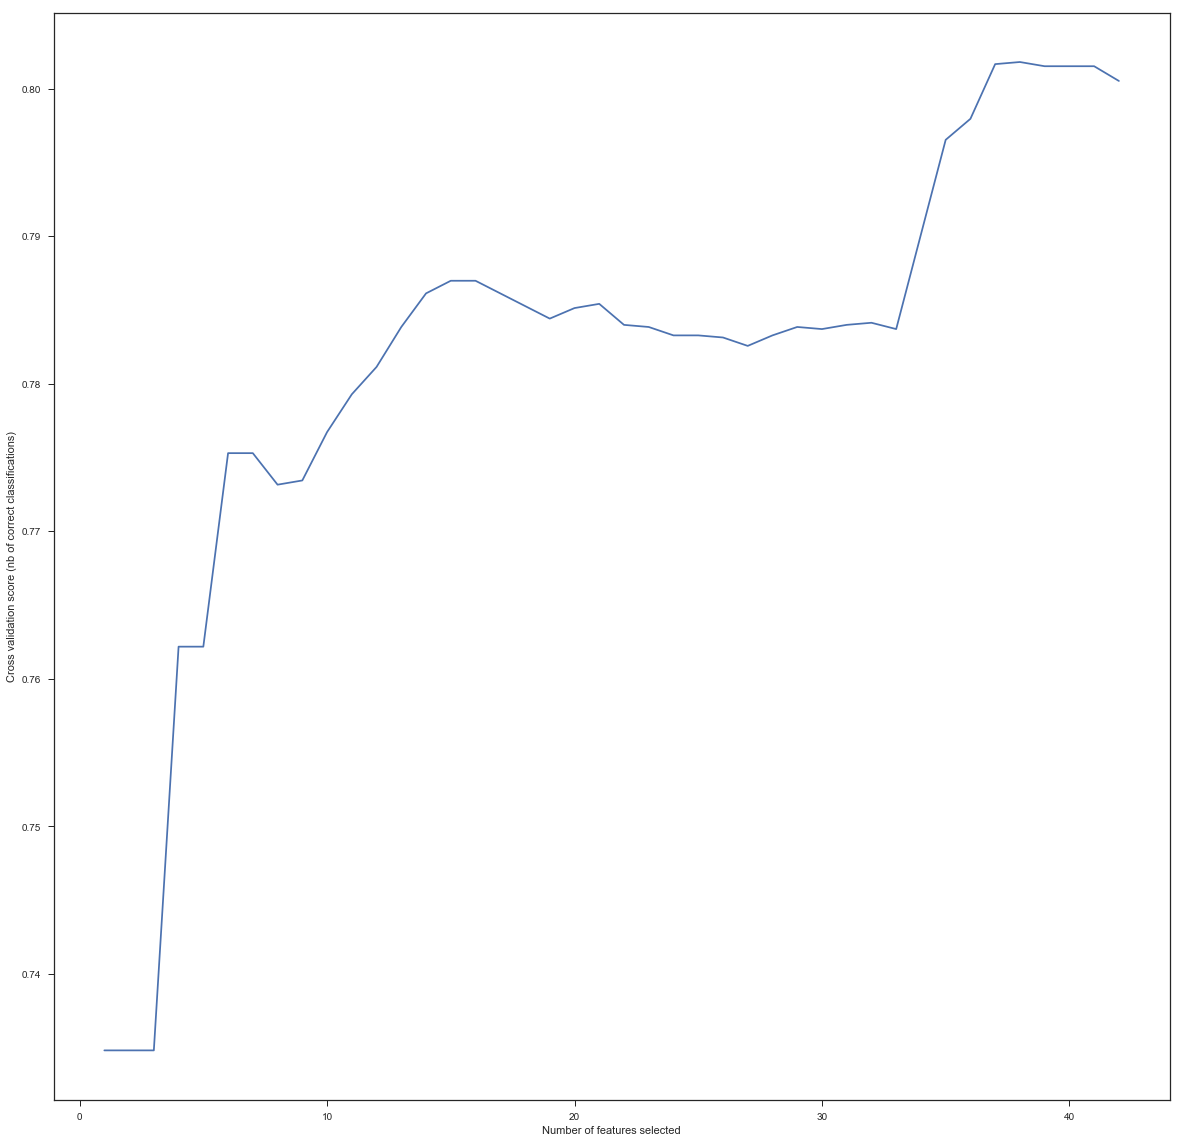

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, Y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(20,20))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
from sklearn.linear_model import Lasso as lasso
from sklearn.linear_model import Ridge as ridge

In [35]:
features = ['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MonthlyCharges'
         ,'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
         'InternetService_DSL','InternetService_Fiber optic','InternetService_No', 'OnlineSecurity_No',
         'OnlineSecurity_No internet service','OnlineSecurity_Yes','OnlineBackup_No','OnlineBackup_No internet service',
         'OnlineBackup_Yes','DeviceProtection_No','DeviceProtection_No internet service','DeviceProtection_Yes',
         'TechSupport_No','TechSupport_No internet service','TechSupport_Yes','StreamingTV_No','StreamingTV_No internet service',
         'StreamingTV_Yes','StreamingMovies_No','StreamingMovies_No internet service','StreamingMovies_Yes','Contract_Month-to-month',
         'Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)',
         'PaymentMethod_Electronic check','PaymentMethod_Mailed check','TotalCharges']
target = 'Churn'

classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb(),
    lasso(),
    ridge()
]

classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes',
    'Lasso',
    'Ridge'
]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20,random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (5614, 42)
Y_train shape: (5614, 1)
X_test shape: (1404, 42)
Y_test shape: (1404, 1)


In [33]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [37]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, X_train, Y_train, cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

K nearest neighbors  mean accuracy:  76.345 % std:  0.001 %
Decision Tree Classifier  mean accuracy:  72.177 % std:  0.029 %
SVM classifier with RBF kernel  mean accuracy:  76.505 % std:  0.004 %
SVM classifier with linear kernel  mean accuracy:  79.088 % std:  0.008 %
Gaussian Naive Bayes  mean accuracy:  68.293 % std:  0.022 %
Lasso  mean accuracy:  20.257 % std:  0.005 %
Ridge  mean accuracy:  27.035 % std:  0.014 %


In [38]:
final_model_smv_lin = SVC(kernel='linear').fit(X_train, Y_train)
final_model_svm_rbf = SVC().fit(X_train, Y_train)

test accuracy for SVM classifier with a linear kernel: 0.8012820512820513


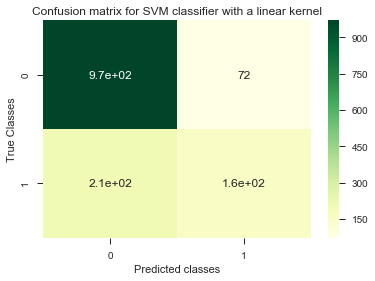

test accuracy for SVM classifier with a rbf kernel: 77.92 %


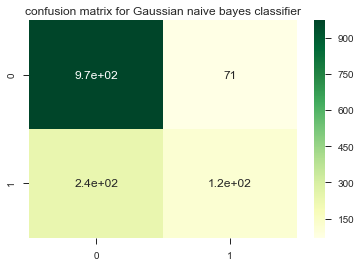

In [51]:
y_hat_svm = final_model_smv_lin.predict(X_test)
y_hat_svm_r = final_model_svm_rbf.predict(X_test)

print('test accuracy for SVM classifier with a linear kernel:'\
      , round(accuracy_score(Y_test, y_hat_svm)*100, 2), '%')
plt.title('Confusion matrix for SVM classifier with a linear kernel')
sns.heatmap(confusion_matrix(Y_test, y_hat_svm), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()
prin
print('test accuracy for SVM classifier with a rbf kernel:', \
      round(accuracy_score(Y_test, y_hat_svm_r)*100, 2),'%')
plt.title('confusion matrix for Gaussian naive bayes classifier')
sns.heatmap(confusion_matrix(Y_test, y_hat_svm_r), annot=True, cmap="YlGn")
plt.show()

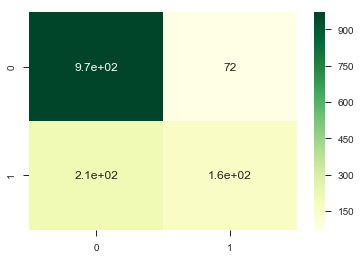

In [44]:
sns.heatmap(confusion_matrix(Y_test, y_hat_svm), annot=True, cmap="YlGn")

# Confussion Matrix For SVC Linear

In [80]:
clf = SVC(kernel = 'linear').fit(X_train, Y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87      1042
          1       0.68      0.43      0.53       362

avg / total       0.79      0.80      0.78      1404



# Confussion Matrix For SVC RBF

In [54]:
clf = SVC().fit(X_train, Y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)

In [55]:
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          0       0.80      0.93      0.86      1042
          1       0.63      0.34      0.44       362

avg / total       0.76      0.78      0.75      1404



# Confussion Matrix For K nearest neighbors

In [92]:
clf = knnc().fit(X_train, Y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)

In [93]:
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.86      0.84      1042
          1       0.54      0.45      0.49       362

avg / total       0.75      0.76      0.75      1404



# Confussion Matrix For Decision Tree

In [59]:
clf = dtc().fit(X_train, Y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)

In [60]:
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.83      0.83      1042
          1       0.50      0.47      0.48       362

avg / total       0.74      0.74      0.74      1404



## Confussion Matrix For Decision Tree

# 

In [62]:
from sklearn.linear_model import LogisticRegression

In [86]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.05

In [87]:
print(classification_report(Y_test,Y_pred))

             precision    recall  f1-score   support

          0       0.86      0.90      0.88      1042
          1       0.66      0.57      0.61       362

avg / total       0.81      0.81      0.81      1404



In [88]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]

In [89]:
from sklearn.metrics import roc_curve


In [90]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

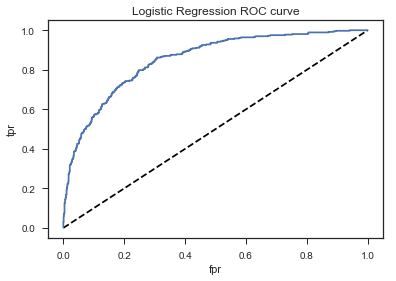

AUC: 0.8517181684181503


In [91]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logreg')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
print('AUC:',roc_auc_score(Y_test,y_pred_proba))

In [103]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression


In [110]:
param_grid_log = [
  {'penalty': ['l2'], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga']},
  {'penalty': ['l2'], 'solver': ['newton-cg']},
 ]

In [113]:
from sklearn.linear_model import LogisticRegression 
grid_search_log = GridSearchCV(LogisticRegression(), param_grid_log, scoring='neg_mean_squared_error',  cv=5)
grid_search_log.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_log.best_params_))
log_best_cross_val_score = (np.sqrt(-grid_search_log.best_score_))
print("Best cross-validation score: {:f}".format(np.expm1(log_best_cross_val_score)))
log_score = np.sqrt(-grid_search_log.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(log_score)))

C:\Users\sq3508nw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\sq3508nw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\sq3508nw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\sq3508nw\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Best parameters: {'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation score: 0.568053
Test set score: 0.54


In [120]:
feature_importance = grid_search_log.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,15))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns.values[sorted_idx]) #Not 100 % sure the feature names match the importances correctly...
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [ ]:
features = ['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MonthlyCharges'
         ,'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
         'InternetService_DSL','InternetService_Fiber optic','InternetService_No', 'OnlineSecurity_No',
         'OnlineSecurity_No internet service','OnlineSecurity_Yes','OnlineBackup_No','OnlineBackup_No internet service',
         'OnlineBackup_Yes','DeviceProtection_No','DeviceProtection_No internet service','DeviceProtection_Yes',
         'TechSupport_No','TechSupport_No internet service','TechSupport_Yes','StreamingTV_No','StreamingTV_No internet service',
         'StreamingTV_Yes','StreamingMovies_No','StreamingMovies_No internet service','StreamingMovies_Yes','Contract_Month-to-month',
         'Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)',
         'PaymentMethod_Electronic check','PaymentMethod_Mailed check','TotalCharges']
target = 'Churn'